# CAR PRICE PREDICTION

This dataset contains information about used cars

This data can be used a lot of purposes such as price prediction to exemplify the use of the linear regression in Machine Learning

This columns in the given datasets are as follows:

1. Name_Car : This column should be filled with the name of the car.
2. Year : This column should be filled with the year in which car was bought.
3. Selling_Price: This column should be filled with the price the owner wants to sell the car at(IDR)
4. Present_Price: This is the current ex-showroom price of the car(IDR)
5. Kms_Driven: This is the distance completed by the car in km.
6. Fuel_Type: Fuel type of the car.
7. Seller_Type: Defines whether the seller is a dealer or an individual.
8. Transmission: Defines whether the car is manual or automatic.
9. Owner: Defines the number of owners the cars has previously had.

# 1. Import Relevant Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## 2.Import Dataset

In [24]:
df = pd.read_excel('CAR_DATA_IDRx1jt.xlsx')

## 3.General Explanation

In [25]:
df.head()

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Present_Price
0,ritz,2014,27000,Petrol,Dealer,Manual,0,61.64,102.856
1,sx4,2013,43000,Diesel,Dealer,Manual,0,87.40,175.536
2,ciaz,2017,6900,Petrol,Dealer,Manual,0,133.40,181.240
3,wagon r,2011,5200,Petrol,Dealer,Manual,0,52.44,76.360
4,swift,2014,42450,Diesel,Dealer,Manual,0,84.64,126.408


In [26]:
df.columns

Index(['Car_Name', 'Year', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Selling_Price', 'Present_Price'],
      dtype='object')

In [27]:
df.shape

(301, 9)

In [28]:
df.dtypes

Car_Name          object
Year               int64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Selling_Price    float64
Present_Price    float64
dtype: object

In [29]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
0       ritz  2014       27000    Petrol      Dealer       Manual      0   
1        sx4  2013       43000    Diesel      Dealer       Manual      0   
2       ciaz  2017        6900    Petrol      Dealer       Manual      0   
3    wagon r  2011        5200    Petrol      Dealer       Manual      0   
4      swift  2014       42450    Diesel      Dealer       Manual      0   
..       ...   ...         ...       ...         ...          ...    ...   
296     city  2016       33988    Diesel      Dealer       Manual      0   
297     brio  2015       60000    Petrol      Dealer       Manual      0   
298     city  2009       87934    Petrol      Dealer       Manual      0   
299     city  2017        9000    Diesel      Dealer       Manual      0   
300     brio  2016        5464    Petrol      Dealer       Manual      0   

     Selling_Price  Present_Price  
0            61.6

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   Selling_Price  301 non-null    float64
 8   Present_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [31]:
df.isnull().sum()

Car_Name         0
Year             0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
Present_Price    0
dtype: int64

## 4. Explore & Clean Data

### 4.1 Car Name

In [32]:
print(df['Car_Name'].nunique())
df['Car_Name'].unique()

98


array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', 800,
       'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'H

There appear to be multiple cars in the dataset, some of which have a count greater than one. Because the resale value of a car can vary depending on the manufacturer, extract the manufacturer from this column and add it to the dataset.

In [33]:
def assign_broder_category(Car_Name):
  honda = ['brio', 'city','Honda CB Hornet 160R', 'Honda CBR 150', 'Honda Activa 4G',
           'Honda CB Trigger', 'Honda CB Unicorn', 'Honda Karizma', 'Honda Activa 125',
           'Honda CB Shine', 'Honda CB twister', 'jazz', 'Honda Dream Yuga ', 'amaze']
  suzuki = ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift','vitara brezza','s cross', 'alto 800',
            'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni', 'Suzuki Access 125', ]
  toyota = ['fortuner', 'innova', 'corolla altis', 'etios g', 'etios liva', 'corolla', 'etios gd',
           'camry', 'land cruiser',]
  royal_enfield = ['Royal Enfield Thunder 500','Royal Enfield Classic 350', 'Royal Enfield Thunder 350',
                   'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',]
  bajaj = [ 'KTM RC200', 'Bajaj Dominar 400', 'KTM 390 Duke ','KTM 390 Duke ','Bajaj Pulsar RS200',
           'Bajaj Avenger 220', 'Bajaj Avenger 150','Bajaj Pulsar 150', 'Bajaj Avenger 220 dtsi',
            'Bajaj Avenger 150 street', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F','Bajaj Pulsar NS 200',
            'Bajaj Avenger Street 220','Bajaj Pulsar 135 LS', 'Bajaj Discover 125', 'Bajaj  ct 100']
  yamaha =['Yamaha FZ S V 2.0', 'Yamaha FZ 16','Yamaha FZ  v 2.0', 'Yamaha Fazer ','Yamaha FZ S ']
  tvs = ['TVS Apache RTR 160', 'TVS Apache RTR 180', 'TVS Sport ','TVS Jupyter', 'TVS Wego']
  hero = ['Hero Extreme','Hero Passion X pro', 'Hero Splender iSmart', 'Hero Passion Pro', 'Hero Honda CBZ extreme',
          'Hero Honda Passion Pro', 'Hero Splender Plus', 'Hero Glamour', 'Hero Super Splendor','Hero Hunk',
          'Hero  Ignitor Disc', 'Hero  CBZ Xtreme']
  hyundai = ['i20', 'grand i10', 'i10','eon', 'xcent', 'elantra', 'creta', 'verna']
  other = ['UM Renegade Mojave', 'Hyosung GT250R', 'Mahindra Mojo XT300', 'Activa 3g', 'Activa 4g' ]

  if Car_Name in honda:
    return "honda"
  elif Car_Name in suzuki:
    return "suzuki"
  elif Car_Name in toyota:
    return "toyota"
  elif Car_Name in royal_enfield:
    return "royal_enfield"
  elif Car_Name in bajaj:
    return "bajaj"
  elif Car_Name in yamaha:
    return "yamaha"
  elif Car_Name in tvs:
    return "tvs"
  elif Car_Name in hero:
    return "hero"
  elif Car_Name in hyundai:
    return "hyundai"
  else:
    return "Other"

df.loc[:,"manufacturer"] = df["Car_Name"].apply(assign_broder_category)

Text(0, 0.5, 'Count of cars')

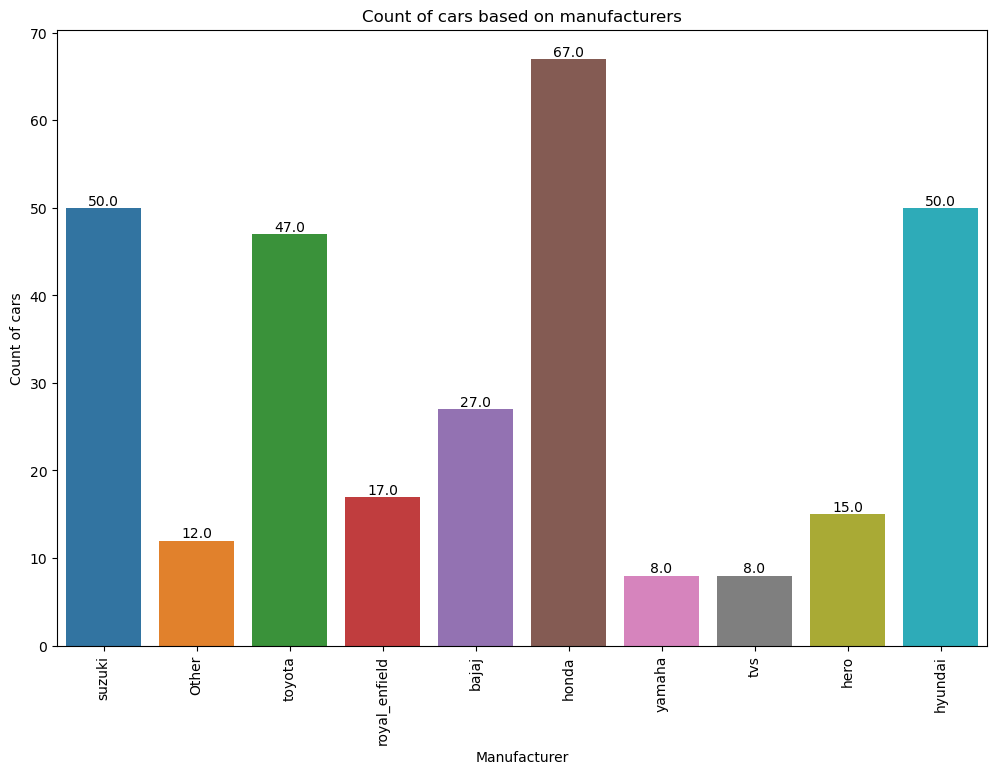

In [34]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'manufacturer', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer Honda and there are no null values.

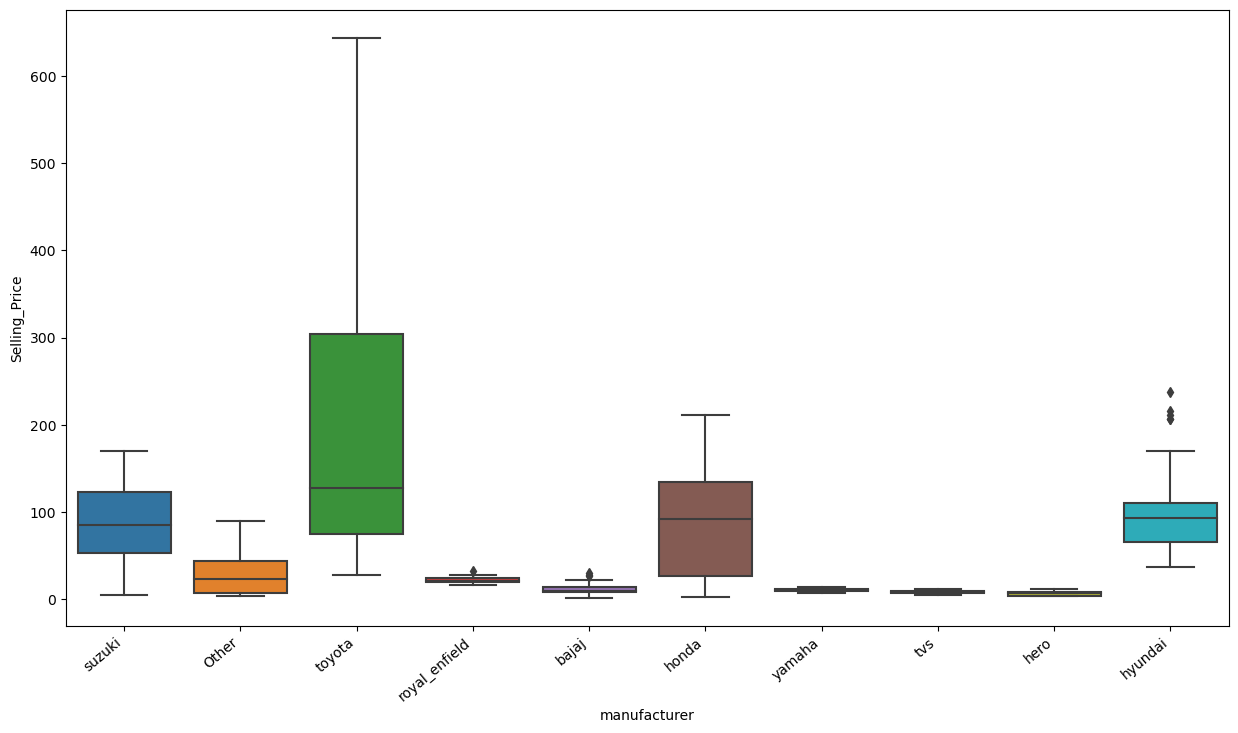

In [35]:
# Checking relationship of Manufacturer with Selling Price

plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='manufacturer',y='Selling_Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [36]:
df.drop(['Car_Name'], axis=1, inplace=True)

### 4.2 Car Age

In [37]:
df['Current Year'] = 2023

In [38]:
df['Age'] = df['Current Year'] - df['Year']

In [39]:
df.drop(['Year'], axis=1, inplace=True)
df.drop(['Current Year'], axis=1, inplace=True)
df

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Present_Price,manufacturer,Age
0,27000,Petrol,Dealer,Manual,0,61.64,102.856,suzuki,9
1,43000,Diesel,Dealer,Manual,0,87.40,175.536,suzuki,10
2,6900,Petrol,Dealer,Manual,0,133.40,181.240,suzuki,6
3,5200,Petrol,Dealer,Manual,0,52.44,76.360,suzuki,12
4,42450,Diesel,Dealer,Manual,0,84.64,126.408,suzuki,9
...,...,...,...,...,...,...,...,...,...
296,33988,Diesel,Dealer,Manual,0,174.80,213.440,honda,7
297,60000,Petrol,Dealer,Manual,0,73.60,108.560,honda,8
298,87934,Petrol,Dealer,Manual,0,61.64,202.400,honda,14
299,9000,Diesel,Dealer,Manual,0,211.60,230.000,honda,6


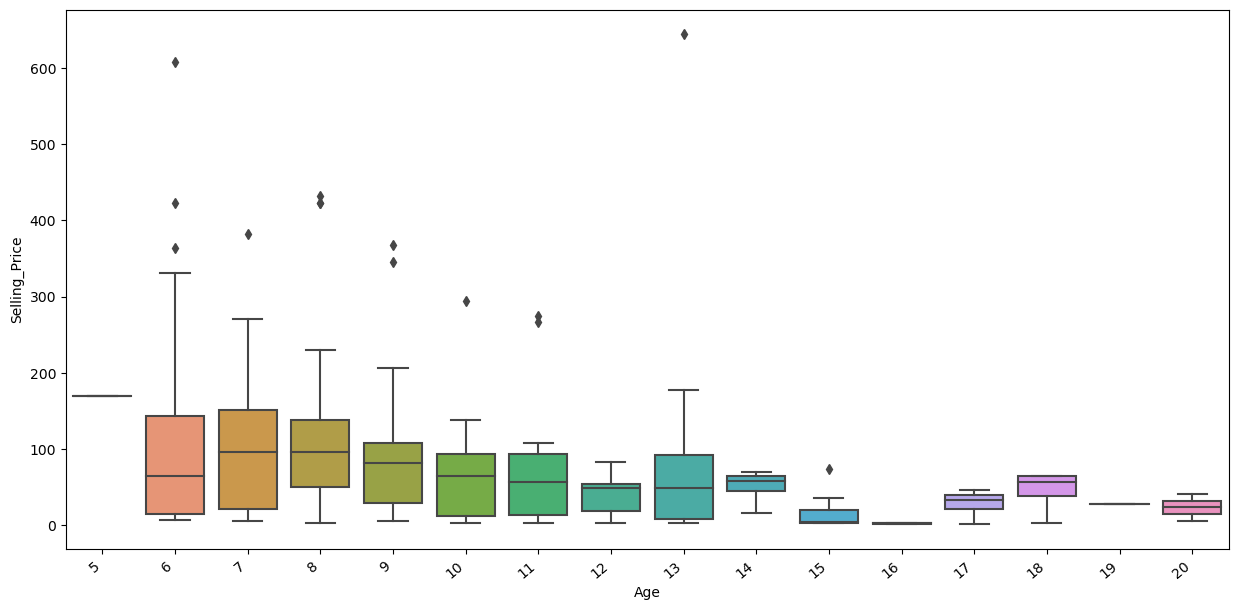

In [41]:
# Checking relationship of Year with Selling Price

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Age',y='Selling_Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## 5. Transform Categorical features

In [42]:
#Unique values in each categorical variable:

df["manufacturer"].nunique()

df["manufacturer"].unique()

array(['suzuki', 'Other', 'toyota', 'royal_enfield', 'bajaj', 'honda',
       'yamaha', 'tvs', 'hero', 'hyundai'], dtype=object)

In [43]:
df["Fuel_Type"].nunique()

df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [44]:
df["Seller_Type"].nunique()

df["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [45]:
df["Transmission"].nunique()

df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [46]:
#Incase if manufacturer is an object:

identity = df["manufacturer"]

df = df.drop(columns="manufacturer")

In [47]:
df = pd.get_dummies(df,drop_first=True)

In [48]:
df

,Kms_Driven,Owner,Selling_Price,Present_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,27000,0,61.64,102.856,9,0,1,0,1
1,43000,0,87.40,175.536,10,1,0,0,1
2,6900,0,133.40,181.240,6,0,1,0,1
3,5200,0,52.44,76.360,12,0,1,0,1
4,42450,0,84.64,126.408,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,33988,0,174.80,213.440,7,1,0,0,1
297,60000,0,73.60,108.560,8,0,1,0,1
298,87934,0,61.64,202.400,14,0,1,0,1
299,9000,0,211.60,230.000,6,1,0,0,1


In [49]:
# Define correlation matrix
corr_matrix = df.corr()
corr_matrix

,Kms_Driven,Owner,Selling_Price,Present_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Kms_Driven,1.000000,0.089216,0.028545,0.204851,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.089216,1.000000,-0.088726,0.007673,0.182104,-0.053469,0.055687,0.124269,-0.050316
Selling_Price,0.028545,-0.088726,1.000000,0.879107,-0.235647,0.551917,-0.540121,-0.550018,-0.366741
Present_Price,0.204851,0.007673,0.879107,1.000000,0.047824,0.474628,-0.467285,-0.512708,-0.348639
Age,0.524342,0.182104,-0.235647,0.047824,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.172515,-0.053469,0.551917,0.474628,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.172874,0.055687,-0.540121,-0.467285,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.101419,0.124269,-0.550018,-0.512708,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.162510,-0.050316,-0.366741,-0.348639,-0.000394,-0.098643,0.091013,0.063240,1.000000


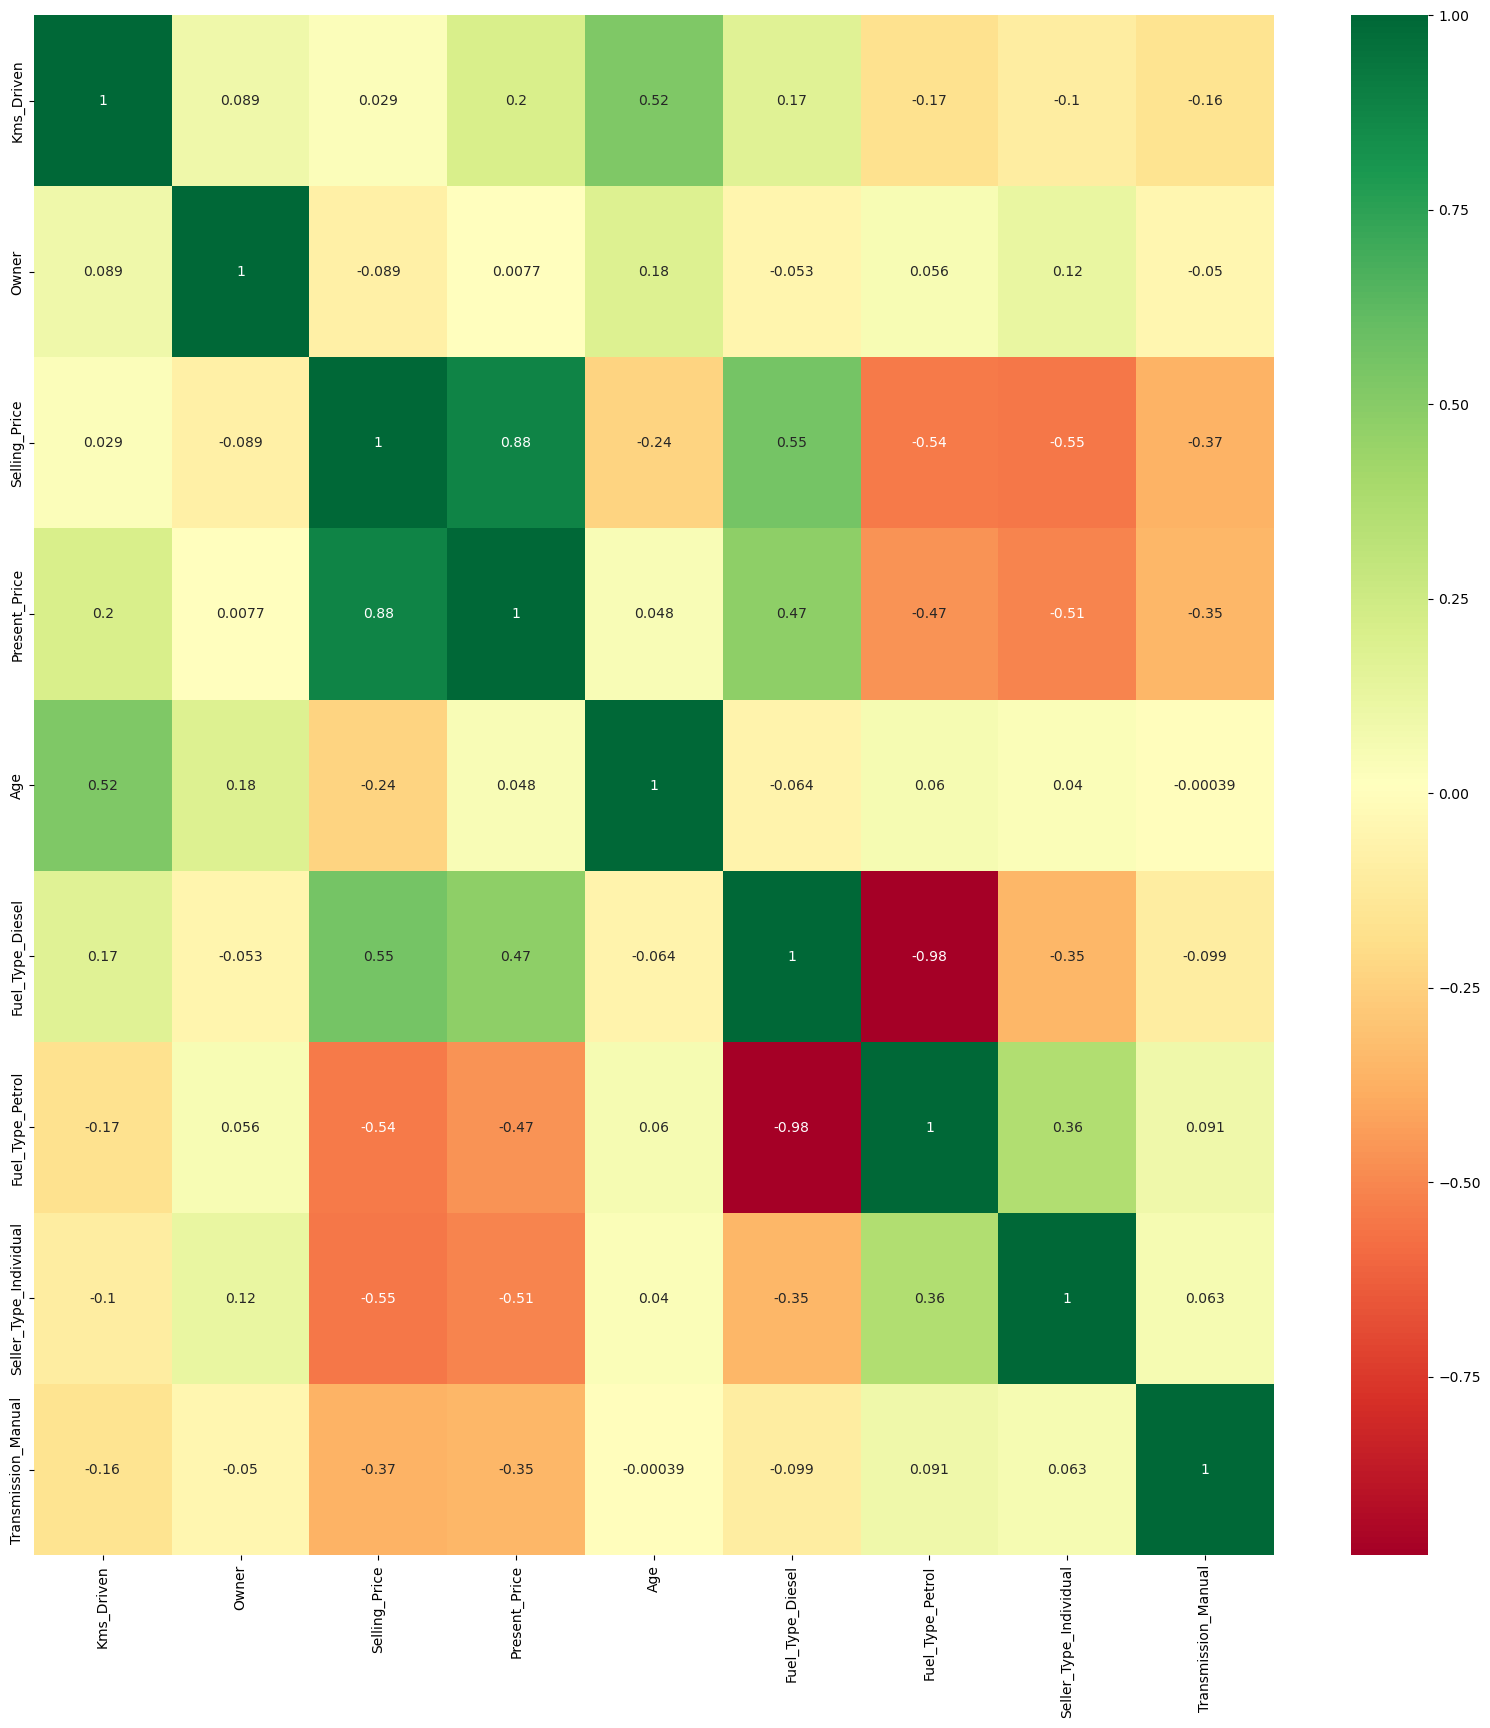

In [50]:
corrmat = df.corr()
top_corr_features = corrmat.index
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format
plt.figure(figsize=(20,20))

#plot heat map of the corerlation of the features
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

## 6. Split Dataset into Dependent and Independent Variables

Text(0, 0.5, '')

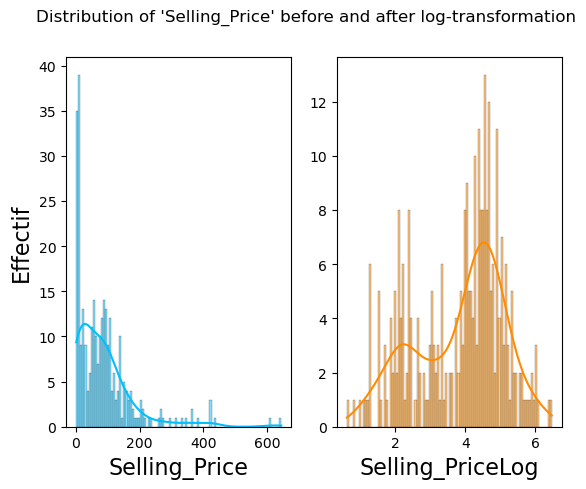

In [51]:
df["Selling_PriceLog"] = np.log(df.Selling_Price)

fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'Selling_Price' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=df["Selling_Price"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("Selling_Price", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=df["Selling_PriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("Selling_PriceLog", fontsize=16)
q.set_ylabel("", fontsize=16)

In [52]:
# Features
X = df.drop(columns=["Selling_PriceLog", "Selling_Price"])
# Target
y = df["Selling_PriceLog"]

In [53]:
X.head()

,Kms_Driven,Owner,Present_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,27000,0,102.86,9,0,1,0,1
1,43000,0,175.54,10,1,0,0,1
2,6900,0,181.24,6,0,1,0,1
3,5200,0,76.36,12,0,1,0,1
4,42450,0,126.41,9,1,0,0,1


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (240, 8)
Number transactions y_train dataset:  (240,)
Number transactions X_test dataset:  (61, 8)
Number transactions y_test dataset:  (61,)


## 7. Feature Scaling

In [55]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## 8. Modelling

### 8.1 Model selection

In [56]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_

In [57]:
# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_

In [58]:
# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [59]:
# Define regression models
dtr =  DecisionTreeRegressor()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [dtr, ridge, lasso, elastic, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: DecisionTreeRegressor
R²: 0.9375925779473975
RMSE: 0.2981721929200511

- Regressor: Ridge
R²: 0.9449920064021782
RMSE: 0.27993804166016434

- Regressor: Lasso
R²: 0.9450920076956418
RMSE: 0.279683470470249

- Regressor: ElasticNet
R²: 0.945124930428278
RMSE: 0.2795996090466641

- Regressor: RandomForestRegressor
R²: 0.9617270633610292
RMSE: 0.2335043153545678

- Regressor: XGBRegressor
R²: 0.9508566771466563
RMSE: 0.2645947830073857

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 7
[LightGBM] [Info] Start training from score 3.781172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

### 8.2 Hyperparameters tuning and model optimization

#### Ridge regression

In [60]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 33.9322177189533}
Best R² (train): 0.82062942562697


In [61]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.9318629687559209
RMSE: 0.3115592297758485


In [62]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

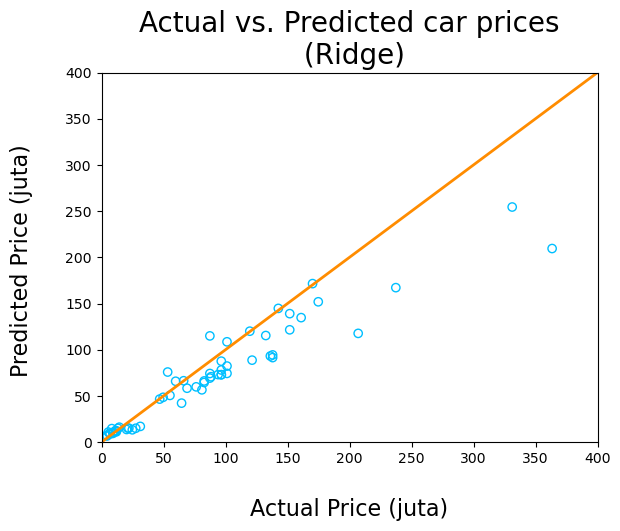

In [63]:
# Plot Actual vs. Predicted Car prices
actual_price = np.exp(y_test)
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted car prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 400], [0, 400], "darkorange", lw=2)
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel("\nActual Price (juta)", fontsize=16)
plt.ylabel("Predicted Price (juta) \n", fontsize=16)
plt.show()

#### Lasso regression

In [64]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 0.07543120063354623}
Best R² (train): 0.8395859158871213


In [65]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.9302821659074985
RMSE: 0.3151526484425879


In [66]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

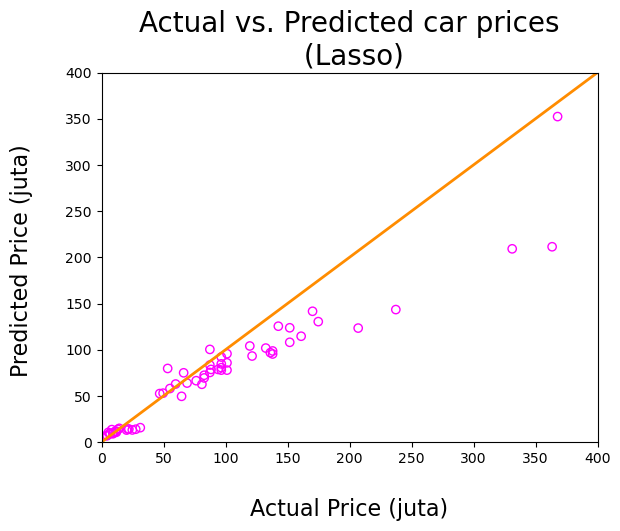

In [67]:
# Plot Actual vs. Predicted Car prices
actual_price = np.exp(y_test)
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted car prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="magenta", marker="o", facecolors="none")
plt.plot([0, 400], [0, 400], "darkorange", lw=2)
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel("\nActual Price (juta)", fontsize=16)
plt.ylabel("Predicted Price (juta) \n", fontsize=16)
plt.show()

#### Random Forest

In [78]:
# Define regression models
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate R-squared (R2) and RMSE scores
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print_score(y_test, y_pred)

- Regressor: RandomForestRegressor
R²: 0.96272484565162
RMSE: 0.23044046510877028



In [81]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(rf.__class__.__name__)  # Store the model name
r2_list.append(round(r2, 4))  # Store the R2 score rounded to 4 decimal places
rmse_list.append(round(rmse, 4))  # Store the RMSE rounded to 4 decimal places

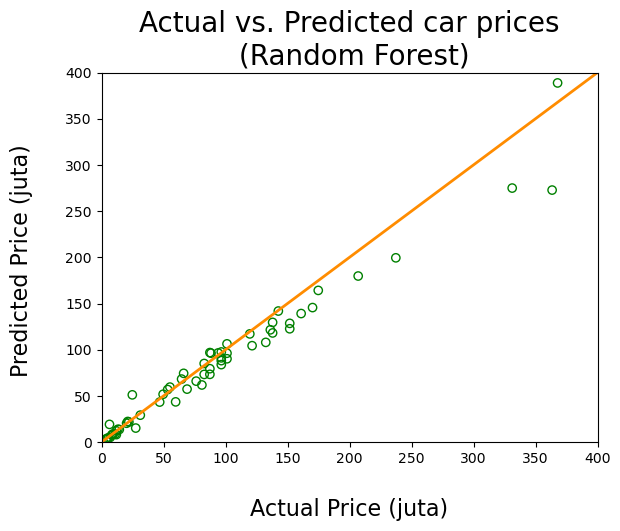

In [83]:
# Plot Actual vs. Predicted Car prices
actual_price = np.exp(y_test)
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted car prices\n (Random Forest)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="green", marker="o", facecolors="none")
plt.plot([0, 400], [0, 400], "darkorange", lw=2)
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel("\nActual Price (juta)", fontsize=16)
plt.ylabel("Predicted Price (juta) \n", fontsize=16)
plt.show()

## 9 Evaluating Algorithm

RMSE:
1. Ridge Regression: 0.31155922977584855
2. Lasso Regression: 0.3151526484425879
3. Random Forest: 0.2332975926170361

R2:
1. Ridge Regression: 0.9318629687559209
2. Lasso Regression: 0.9302821659074985
3. Random Forest: 0.96272484565162

Berdasarkan hasil RMSE (Root Mean Squared Error) dan R2 (R-squared) untuk tiga model yang berbeda, berikut adalah beberapa kesimpulan yang diambil:

**RMSE:**

Random Forest memiliki RMSE yang paling rendah (0.2333), yang berarti model ini memiliki kesalahan prediksi yang lebih kecil dalam memperkirakan nilai target.

Ridge Regression memiliki RMSE sedikit lebih tinggi (0.3116) dibandingkan dengan Random Forest, yang menunjukkan tingkat kesalahan yang lebih tinggi dalam prediksi.

Lasso Regression juga memiliki RMSE yang agak lebih tinggi (0.3152) dibandingkan dengan Random Forest.


**R2:**

Random Forest memiliki nilai R2 yang tertinggi (0.9627), yang berarti model ini dapat menjelaskan variasi dalam data target dengan sangat baik. Nilai R2 mendekati 1 adalah tanda bahwa model sangat baik dalam menjelaskan data.

Ridge Regression juga memiliki R2 yang tinggi (0.9319), yang menunjukkan kemampuan model untuk menjelaskan variasi dalam data dengan baik, meskipun sedikit lebih rendah daripada Random Forest.

Lasso Regression juga memiliki R2 yang tinggi (0.9303), mirip dengan Ridge Regression.


**Kesimpulan yang dapat diambil adalah bahwa Random Forest secara umum memiliki performa yang lebih baik (RMSE lebih rendah dan R2 lebih tinggi) dibandingkan dengan Ridge Regression dan Lasso Regression pada dataset yang digunakan untuk pengujian ini.** 

## Prediction New Data

### Save Model Data

In [86]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf_final=rf.fit(X,y)

In [87]:
import joblib

In [88]:
joblib.dump(rf_final,'car_price_predictor')

['car_price_predictor']

In [89]:
model = joblib.load('car_price_predictor')

In [94]:
import pandas as pd
data_new = pd.DataFrame({
    'Kms_Driven':3.2,
    'Owner':0,
    'Present_Price':34,
    'Age':3,
    'Fuel_Type_Diesel':0,
    'Fuel_Type_Petrol':1,
    'Seller_Type_Individual':0,
    'Transmission_Manual':1,
},index=[0])

In [95]:
model.predict(data_new)

array([3.42894021])

In [102]:
from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    
    model = joblib.load('car_price_predictor')
    data_new = pd.DataFrame({
    'Kms_Driven':p1,
    'Owner':p2,
    'Present_Price':p3,
    'Age':p4,
    'Fuel_Type_Diesel':p5,
    'Fuel_Type_Petrol':p6,
    'Seller_Type_Individual':p7,
    'Transmission_Manual':p8
},index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=9)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Kms_Driven").grid(row=1)
Label(master, text="Owner").grid(row=2)
Label(master, text="Present_Price").grid(row=3)
Label(master, text="Age").grid(row=4)
Label(master, text="Fuel_Type_Diesel").grid(row=5)
Label(master, text="Fuel_Type_Petrol").grid(row=6)
Label(master, text="Seller_Type_Individual").grid(row=7)
Label(master, text="Transmission_Manual").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Car Purchase amount 3.1388465254539564


In [104]:
joblib.dump(rf_final, 'rf_model.pkl')

['rf_model.pkl']